In [1]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt

In [86]:
folder_dir = r"C:\Users\ROHIT\Desktop\Flower Recognition\flowers"

In [87]:
data = []  # List to store image data
label = [] #List to store corresponding labels

SIZE = 128   # Crop the image to 128x128

for folder in os.listdir(folder_dir):
    # Check if the file has a "jpg" extension
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            # Convert the image from BGR to RGB color format
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            # Append the processed image to the data list
            data.append(im)
        else:
            continue

In [88]:
data_arr = np.array(data)
label_arr = np.array(label)

In [89]:
encoder = LabelEncoder()
# convert label_arr into numericals
y = encoder.fit_transform(label_arr)
# numericals into one hot encoding
y = to_categorical(y,5)
# normalize pixel values between 0 and 1
X = data_arr/255

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [96]:
model = Sequential()
model.add(Conv2D(64, (3,3), padding='Same', activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))


In [97]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [98]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=7

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/7
122/122 [==============================] - 53s 426ms/step - loss: 4.2701 - accuracy: 0.2438 - val_loss: 2.5075 - val_accuracy: 0.2575
Epoch 2/7
122/122 [==============================] - 49s 399ms/step - loss: 2.2807 - accuracy: 0.2825 - val_loss: 1.6913 - val_accuracy: 0.3828
Epoch 3/7
122/122 [==============================] - 49s 398ms/step - loss: 2.0174 - accuracy: 0.3382 - val_loss: 1.8248 - val_accuracy: 0.3573
Epoch 4/7
122/122 [==============================] - 49s 399ms/step - loss: 1.8842 - accuracy: 0.3434 - val_loss: 2.0861 - val_accuracy: 0.3944
Epoch 5/7
122/122 [==============================] - 49s 404ms/step - loss: 2.1504 - accuracy: 0.3382 - val_loss: 3.0563 - val_accuracy: 0.3202
Epoch 6/7
122/122 [==============================] - 49s 402ms/step - loss: 2.3003 - accuracy: 0.3367 - val_loss: 2.1900 - val_accuracy: 0.3550
Epoch 7/7
122/122 [==============================] - 48s 392ms/step - loss: 1.9254 - accuracy: 0.3596 - val_loss: 1.7109 - val_accuracy:

14/14 [==============================] - 1s 74ms/step


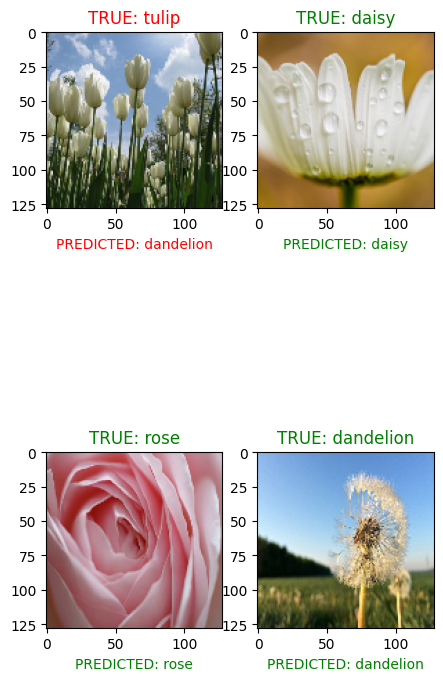

In [99]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(2,2, figsize=(5,10))
# creating a subplot
for i in range(2):
    for j in range(2):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')